## Final Project Submission

* Student names:

Jeremiah Waiguru

Olive Muloma

Troye Gilbert

Josephine Maro


* Student pace: FULL TIME HYBRID
* Scheduled project review date/time: N/A
* Instructor name: MARYANN MWIKALI
* Blog post URL: N/A


### Data
We have been provided with a dataset with house sale prices in King County, Washington State, USA from 2014 to 2015 to use for this project.

A dataset has been provided and can be found in the kc_house_data.csv file in this repository.

The column names and descriptions as provided can be found in the column_names.md file in this repository.



In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### loading dataset

In [2]:
# loading the data and previewing the dataframe
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation
In this section, we shall be preparing the data for further processing and modelling

### Investigate data types

In [3]:
# shape of our data
df.shape

(21597, 20)

In [4]:
# Describing the data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

The dataset contains 21,597 entries and 20 columns

Some columns like 'waterfront', 'view', 'yr_renovated' have missing values


### loading the column.md dataset

In [6]:
with open('data/column_names.md', 'r') as file:
    md_lines = file.readlines()

df1 = pd.DataFrame({'Text': md_lines})

pd.set_option('display.max_colwidth',None)

# df1

#### cleaning the column_md dataset

In [7]:
df1[['Column name', 'Descriptions']] = df1['Text'].str.split('-', n=1,expand=True)

#### drop the original 'text' column

In [8]:
df1.drop(columns=['Text'], inplace=True)

#### remove rows where 'descriptions' columns contains 'None'

In [9]:
df1 = df1[df1['Descriptions'].notna()]
df1

,Column name,Descriptions
1,* `id`,Unique identifier for a house\n
2,* `date`,Date house was sold\n
3,* `price`,Sale price (prediction target)\n
4,* `bedrooms`,Number of bedrooms\n
5,* `bathrooms`,Number of bathrooms\n
6,* `sqft_living`,Square footage of living space in the home\n
7,* `sqft_lot`,Square footage of the lot\n
8,* `floors`,Number of floors (levels) in house\n
9,* `waterfront`,Whether the house is on a waterfront\n
11,* `view`,Quality of view from house\n


In [10]:
# checking column names
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
# function to check null values
def check_null(df):
    return df.isna().sum()

# checking for null values in the data
check_null(df)

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are missing values in three columns.

Depending on the ratio of missing values, we will decide on what approach to take in dealing with them

## Dealing with missing values


In [12]:
# function to calculate percentage of null values
def miss_percent(df,col):
    miss = ((df[col].isna().sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

# checking percentage of missing values 
miss_percent(df,'waterfront')
miss_percent(df, 'view')
miss_percent(df, 'yr_renovated')

There is 11.00152798999861 percent of values missing in waterfront.
There is 0.29170718155299347 percent of values missing in view.
There is 17.78950780200954 percent of values missing in yr_renovated.


The threshold on how to deal with missing values commonly used is 50% and also depends on the specific column. The percentages of missing values are very low for the specific columns so we can replace.

Checking the year renovated column we may assume the missing value is because the house was never renovated, maybe the house did not have a view or a waterfront also for the other two columns hence we can Fill them with zeros.

Since the missing values in the 3 columns are categorical and are a small percentage of the columns, replacing them with mode won`t skew the data nor give false conclusions

In [13]:
def miss_percent(df, col, fill_value=None):
    miss = ((df[col].isna().sum()) / len(df[col])) * 100
    if fill_value is not None:
        df[col].fillna(fill_value, inplace=True)
    return miss

# checking percentage of missing values and filling missing values with the mode
fill_values = {'waterfront': df['waterfront'].mode()[0], 
               'view': df['view'].mode()[0], 
               'yr_renovated': df['yr_renovated'].mode()[0]}

for col in fill_values:
    missing_percent = miss_percent(df, col, fill_value=fill_values[col])
    print(f'There is {missing_percent:.2f}% of values missing in {col}.')

There is 11.00% of values missing in waterfront.
There is 0.29% of values missing in view.
There is 17.79% of values missing in yr_renovated.


### check duplicates

In [14]:
duplicates = df.duplicated().sum()
duplicates

0

### EDA 1

Exploratory data analysis, including visualizations like scatter plots, bar plots, and heatmaps, is essential before creating regression models. These analyses help understand variable relationships, identify influential predictors, validate model assumptions, and guide feature selection. Visual exploration ensures that subsequent regression models are well-informed, optimized, and interpretable. It also aids in interpreting results and effectively communicating insights, enhancing the overall quality and utility of regression analysis. Conducting thorough exploratory analysis before modeling is crucial for building reliable and actionable regression models.

***1. Heatmap***

The heatmap of correlations between price and features (bedrooms, bathrooms, sqft_living, sqft_lot) is essential for both linear and multilinear regression. It identifies influential predictors based on their relationships with the target variable (price). This helps prioritize predictors in linear models and detect multicollinearity in multilinear models, ensuring stable and interpretable models. Overall, the heatmap guides feature selection and model interpretation in regression analysis.

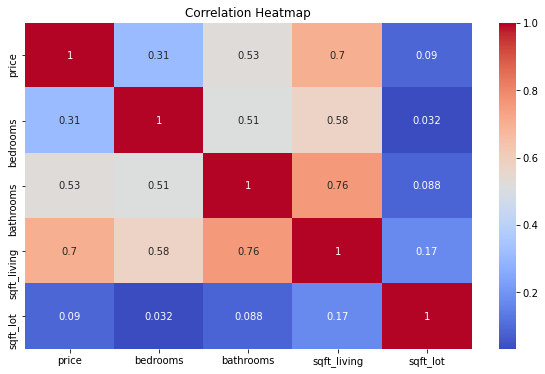

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***2. Bar Graph***

The bar plot of price by condition is essential for developing regression models. It identifies influential condition categories for predictor selection and aids in understanding price variations. This visualization guides preprocessing of categorical variables and validates predictor-target relationships. Overall, it informs feature selection, interpretation, and validation in regression modeling.

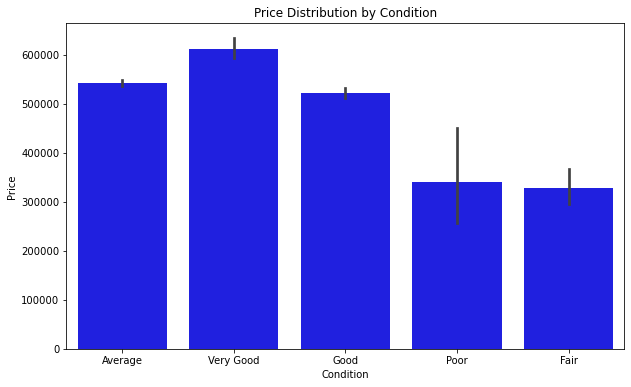

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='condition', y='price', data=df, color='blue')
plt.title('Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

***3. Scatter plot***

The scatter plots of price against square footage of living space (`sqft_living`) and lot size (`sqft_lot`) provide insights for linear and multilinear regression models. They show how price relates to these predictors, helping assess linearity and identify outliers. Clear trends in these plots guide decisions on model complexity and feature engineering, essential for accurate regression analysis.

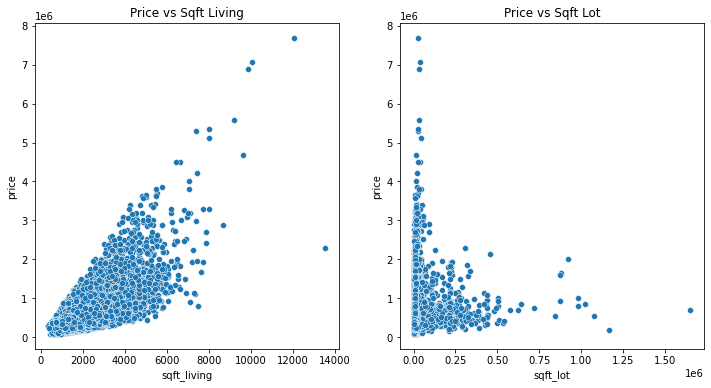

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Sqft Living')
plt.subplot(1, 2, 2)
sns.scatterplot(x='sqft_lot', y='price', data=df)
plt.title('Price vs Sqft Lot')
plt.show()

### PRE-PROCESSING

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [21]:
#  Converting date to datetime format 
df['date'] = pd.to_datetime(df['date'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [22]:
# Convert any houses that have been renovated to '1' to indicate true and any houses that have not been renovated to '0' to indicate false.
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else x)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  object        
 8   view           21597 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  object        
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipco

In [25]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

sqft_basement has a '?' value, let's replace it with a 0

In [26]:
# Convert sqft_basement to int and replace ? with 0
df['sqft_basement'] = df['sqft_basement'].replace({'?':np.nan}).astype(float)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [28]:
# Retrieve the month and year from the date column.
df['month_of_date'] = pd.DatetimeIndex(df['date']).month
df['year_of_date'] = pd.DatetimeIndex(df['date']).year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014


In [29]:
# Drop the date column.
df.drop(columns=['date'], inplace=True)
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014


In [30]:
# Inspecting the condition column
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [31]:
# Mapping conditions with the respective number
# Ratings mapping
ratings_mapping = {
    'Average': 3,
    'Very Good': 1,
    'Good': 2,
    'Poor': 4,
    'Fair': 5
}

# Replace categorical values with numerical values
df['condition'] = df['condition'].replace(ratings_mapping)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NO,NONE,3,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,7 Average,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,3,6 Low Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,1,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


In [32]:
# Inspecting the waterfront column
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [33]:
# Mapping waterfront with the respective number 
# Replacing YES with 1 and NO with 0
df['waterfront'] = df['waterfront'].astype(str).replace({'YES': 1, 'NO': 0})
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,NONE,3,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,0,NONE,3,7 Average,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,0,NONE,3,6 Low Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,0,NONE,1,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,0,NONE,3,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


In [34]:
# Inspecting the view column
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [35]:
# Define the mappings
quality_mapping = {
    'NONE': 0,
    'GOOD': 1,
    'EXCELLENT': 2,
    'AVERAGE': 3,
    'FAIR': 4
}

# Replace the values using the mapping
df['view'] = df['view'].replace(quality_mapping)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7 Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7 Average,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6 Low Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,1,7 Average,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8 Good,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


In [36]:
# Inspecting the grade column
df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [37]:
# Define the mappings
rating_mapping = {
    'Average': 7,
    'Low Average': 6,
    'Good': 8,
    'Excellent': 11,
    'Better': 9,
    'Fair': 5,
    'Very Good': 10,
    'Luxury': 12,
    'Low': 4,
    'Poor': 3,
    'Mansion': 13
}

# Extract the rating string and replace with the corresponding numerical value
df['grade'] = df['grade'].str.extract('(\d+)').astype(int)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,2014
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,1,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64

In [39]:
#Checking the correlation between price (target) and predictors
df.corr()['price'].drop(['price']).map(abs).sort_values(ascending=False)

sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
sqft_basement    0.325008
bedrooms         0.308787
lat              0.306692
view             0.290620
waterfront       0.264306
floors           0.256804
yr_renovated     0.117543
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.040742
long             0.022036
month_of_date    0.009928
year_of_date     0.003727
Name: price, dtype: float64

sqft_living, grade, sqft_above have the highest correlation with the target while year_of_date, month_of_date and long have the lowest correlation with the target.

In [40]:
# Identfying Numeric and categorical columns
numeric = ['bedrooms', 
           'bathrooms', 
           'sqft_living', 
           'sqft_lot', 
           'sqft_above', 
           'sqft_basement',
           'lat', 
           'long',
           'sqft_living15', 
           'sqft_lot15']

categorical = ['floors',
               'waterfront', 
               'view', 
               'condition', 
               'grade',
               'yr_renovated',
               'zipcode',
               'month_of_date']

In [42]:
#reset index and dropping the id column
df.reset_index(inplace=True, drop=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400.0,1951,1.0,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,1,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,2015


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21143 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [45]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_date,year_of_date
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21143.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.246932,2.596703,7.657915,...,291.851724,1970.999676,0.034449,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,2014.322962
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.815213,0.669407,1.173200,...,442.498337,29.375234,0.182384,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,0.467619
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,2014.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,7.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,3.000000,8.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,2015.000000


### MODELLING

***1. Linear Regression model***

We will pick **`sqft_living` - Square footage of living space in the home** to be used to create our linear regression model because it has the most correlation with the price and it has the most linear scatter plor hence a good candidate.